<a href="https://colab.research.google.com/github/Nhan-beo123/CNN-hw/blob/main/btcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/data_restructured"
img_size = (160, 160)
batch_size = 16
seed = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Cảm xúc:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

base_model = MobileNetV2(input_shape=img_size + (3,),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')  # Phân loại cảm xúc
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

model.save("emotion_mobilenet_model.h5")


Found 44 files belonging to 3 classes.
Using 36 files for training.
Found 44 files belonging to 3 classes.
Using 8 files for validation.
Cảm xúc: ['bất ngờ', 'bình thường', 'vui']
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2717 - loss: 1.5958 - val_accuracy: 0.5000 - val_loss: 0.9639
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.2717 - loss: 1.3614 - val_accuracy: 0.5000 - val_loss: 0.9677
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.3073 - loss: 1.4801 - val_accuracy: 0.5000 - val_loss: 1.0125
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.3976 - loss: 1.4664 - val_accuracy: 0.6250 - val_loss: 0.9538
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.4488 - loss: 1.2752 - val_accuracy: 0.6250 - val_loss: 0.9151
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step - accuracy: 0.4627 - loss: 1.3630 - val_accuracy: 0.5000 - val_loss: 0.8968
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - accurac

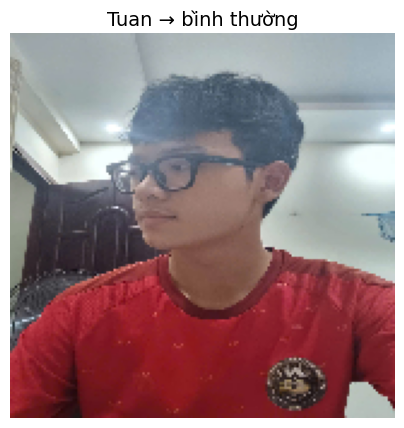

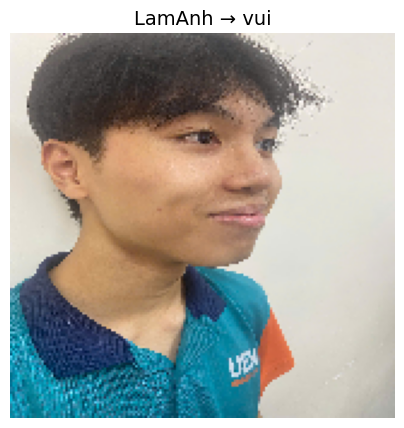

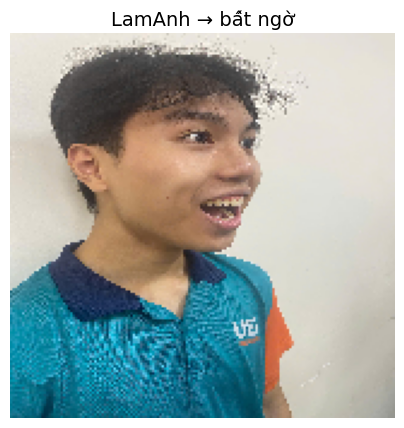

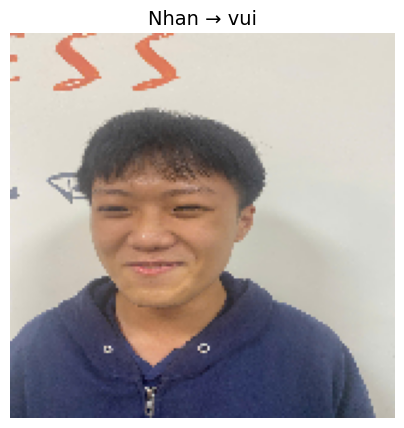

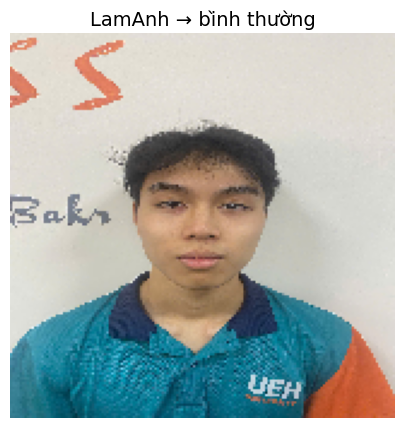

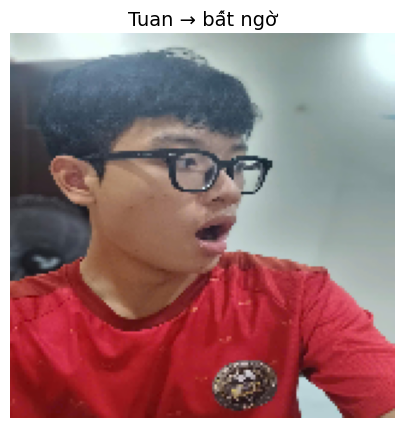

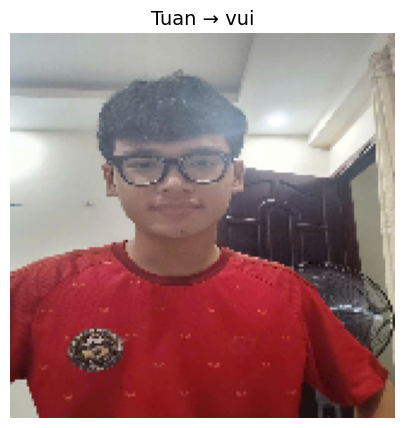

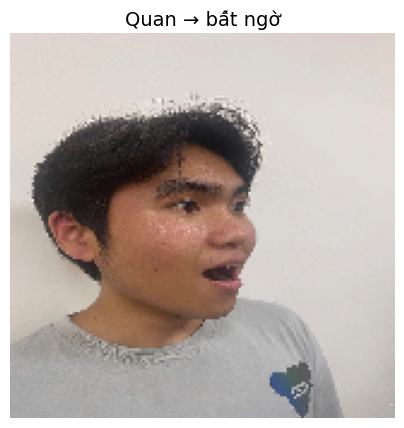

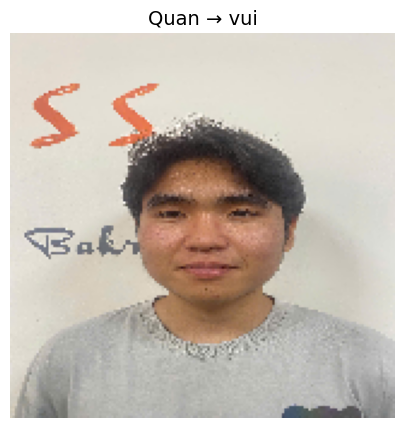

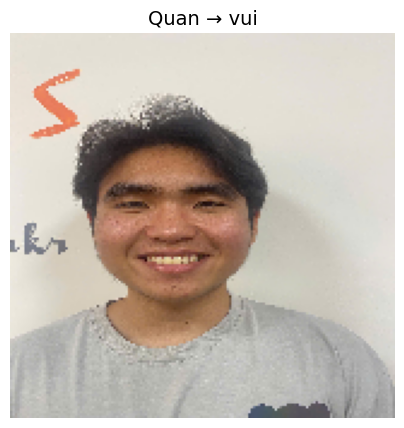

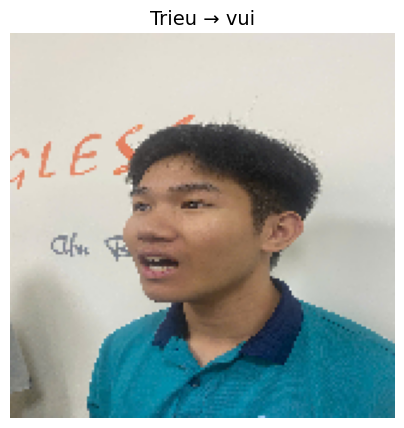

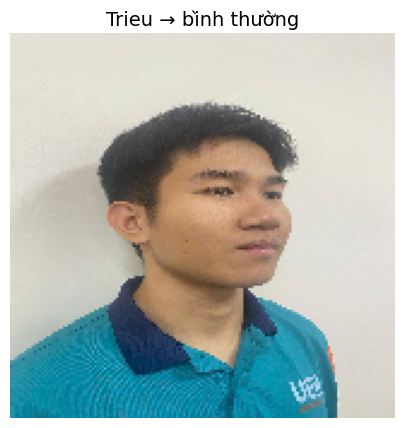

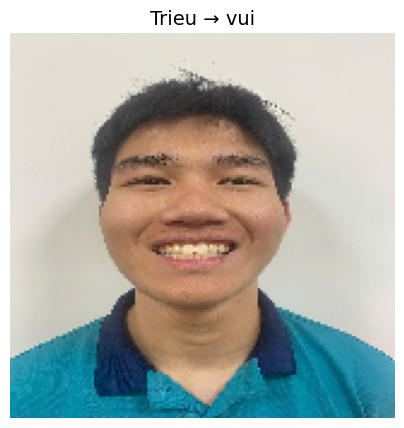

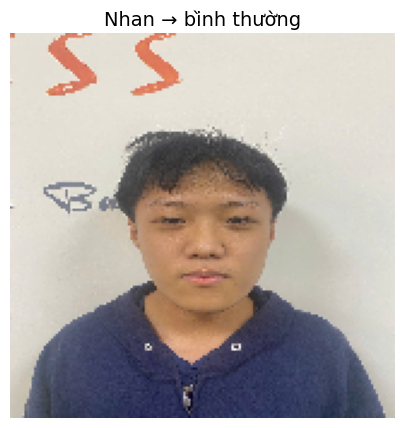

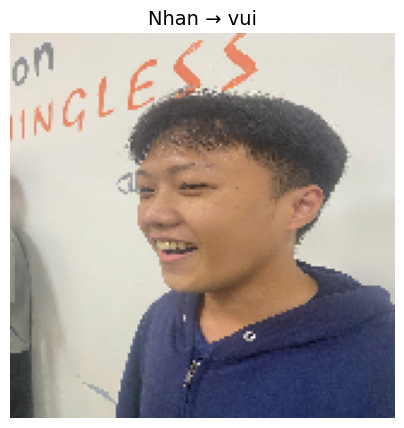

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

img_paths = [
    "/content/drive/MyDrive/data_restructured/bình thường/Tuan_binhthuong_3.jpg",
    "/content/drive/MyDrive/data_restructured/vui/LamAnh_vui_2.jpg",
    "/content/drive/MyDrive/data_restructured/bất ngờ/LamAnh_batngo_2.jpg",
    '/content/drive/MyDrive/data_restructured/vui/Nhan_vui_2.jpg',
    '/content/drive/MyDrive/data_restructured/bình thường/LamAnh_binhthuong_1.jpg',
    '/content/drive/MyDrive/data_restructured/bất ngờ/Tuan_batngo_1.jpg',
    '/content/drive/MyDrive/data_restructured/vui/Tuan_vui_2.jpg',
    '/content/drive/MyDrive/data_restructured/bất ngờ/Quan_batngo_1.jpg',
    '/content/drive/MyDrive/data_restructured/bình thường/Quan_binhthuong_2.jpg',
    '/content/drive/MyDrive/data_restructured/vui/Quan_vui_2.jpg',
    '/content/drive/MyDrive/data_restructured/bất ngờ/Trieu_batngo_3.jpg',
    '/content/drive/MyDrive/data_restructured/bình thường/Trieu_binhthuong_1.jpg',
    '/content/drive/MyDrive/data_restructured/vui/Trieu_vui_2.jpg',
    '/content/drive/MyDrive/data_restructured/bình thường/Nhan_binhthuong_2.jpg',
    '/content/drive/MyDrive/data_restructured/bất ngờ/Nhan_batngo_3.jpg'
]

for img_path in img_paths:

    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array_expanded = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array_expanded, verbose=0)
    predicted_class = class_names[np.argmax(predictions)]

    plt.figure(figsize=(5, 5))
    plt.imshow(np.array(img).astype("uint8"))
    name = os.path.basename(img_path).split("_")[0]
    plt.title(f"{name} → {predicted_class}", fontsize=14)
    plt.axis("off")
    plt.show()

